# Classification model to predict 10-year risk of future coronary heart disease (CHD)

### Objective: To build a classification model that predicts heart disease. (note the target column to predict is 'TenYearCHD' where CHD = Coronary heart disease) 

### We are going to perform the following steps: 

1. Read the file and display columns.
2. Handle missing values, Outliers and Duplicate Data
3. Calculate basic statistics of the data (count, mean, std, etc) and exploratory analysts and describe your observations.
4. Select columns that will be probably important to predict heart disease.
5. If you remove columns explain why you removed those.
6. Create training and testing sets (use 60% of the data for the training and reminder for testing).
7. Build a machine learning model to predict TenYearCHD
Evaluate the model (f1 score, Accuracy, Precision ,Recall and Confusion Matrix)
8. Find Best Model (Model which is giving best f1 score,roc curve and best test score).
9.Finding Best Hyperparameters for Besy Model
10.Conclude final model and save it using pickle



# Importing Libraries

In [ ]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np
# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Data Resampling
from sklearn.utils import resample
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Ensembling
from mlxtend.classifier import StackingCVClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# Reading Dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/framingham.csv") # Reading and converting the data into a pandas dataframe
data.shape # Calculating the dimensions of the dataset

(4238, 16)

In [ ]:
data.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


This shows an overview of the Columns, non-null count and the data types of the dataset

# Data Inspecting and Cleaning 

In [ ]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

It shows the number of np.nan or null values or missing values are present in the dataset:
* education: 105
* cigsPerDay: 29
* BPMeds: 53
* totChol: 50
* BMI: 19
* heartRate: 1
* glucose: 388

In [ ]:
data.duplicated().sum()

0

It shows that there are no Duplicated Values present in the dataset.

In [ ]:
print((data["glucose"].mode())[0])

75.0


In [ ]:
data["glucose"].fillna((data["glucose"].mode())[0], inplace=True)

Filling the missing spaces of `glucose`column with the mode of the data (Mode = 75) present to reduce the number of missing data in our dataset

In [ ]:
data.dropna(inplace=True)
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Dropping all other rows containing missing values

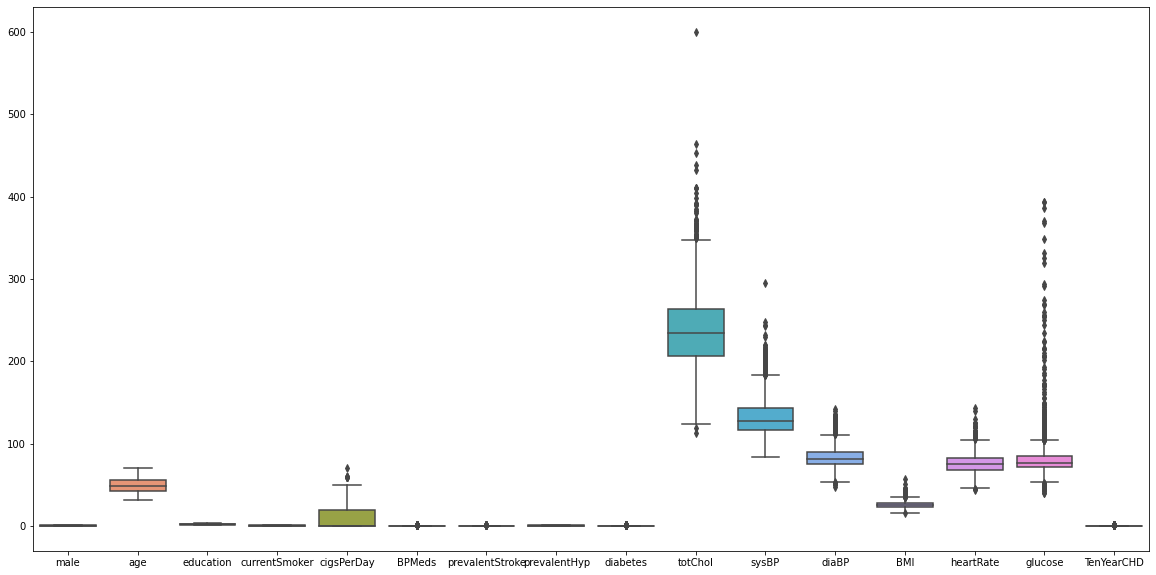

In [ ]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=data)
plt.show()

Removable Outliers are detected in `totChol` and `sysBP` columns of our dataset. Outliers in all other numerical columns are important and thus cannot be removed.

In [ ]:
data['totChol'].max()

600.0

The Outlier present in `totChol` is 600.

In [ ]:
data['sysBP'].max()

295.0

The Outlier present in `sysBP` is 295.

In [ ]:
data = data[data['totChol']<600.0]
data = data[data['sysBP']<295.0]
data.shape

(3985, 16)

Now with the missing values, outliers and duplicate values dealt with, we proceed to perform EDA

# Exploratory Data Analysis

In [ ]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000
mean,0.433375,49.474529,1.982183,0.491343,9.024843,0.029360,0.005521,0.309159,0.025094,236.525220,132.175031,82.845295,25.770750,75.869260,81.275031,0.148808
std,0.495603,8.530533,1.020834,0.499988,11.915833,0.168835,0.074105,0.462205,0.156431,43.651946,21.798425,11.855084,4.075439,12.087749,22.960124,0.355944
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.000000,89.500000,27.990000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,464.000000,248.000000,142.500000,56.800000,143.000000,394.000000,1.000000


An overall Statistical Information is shown
* It is clearly evident that none of the data is missing in columns.
* It also shows the mean, standard deviation and other statistical metrices of the dataset 
* It also shows the categorical data of the dataset since they were already converted into discrete numerical values

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.022235,0.012785,0.201021,0.326216,-0.050110,-0.003651,0.007760,0.018333,-0.067305,-0.031883,0.059774,0.079957,-0.115356,0.009177,0.092499
age,-0.022235,1.000000,-0.160269,-0.213397,-0.190141,0.128526,0.045090,0.304449,0.104873,0.271017,0.389739,0.205375,0.133180,-0.008901,0.115920,0.228785
education,0.012785,-0.160269,1.000000,0.018139,0.006082,-0.010071,-0.028561,-0.081419,-0.034923,-0.022794,-0.127519,-0.062823,-0.135427,-0.057836,-0.031222,-0.053491
currentSmoker,0.201021,-0.213397,0.018139,1.000000,0.770709,-0.049023,-0.032582,-0.104632,-0.038941,-0.047260,-0.129664,-0.108643,-0.164071,0.052329,-0.051569,0.023460
cigsPerDay,0.326216,-0.190141,0.006082,0.770709,1.000000,-0.044031,-0.033982,-0.065883,-0.035211,-0.024816,-0.086910,-0.050297,-0.086776,0.067909,-0.050980,0.060261
BPMeds,-0.050110,0.128526,-0.010071,-0.049023,-0.044031,1.000000,0.127474,0.259984,0.048127,0.087240,0.262679,0.196835,0.103288,0.016394,0.054379,0.090173
prevalentStroke,-0.003651,0.045090,-0.028561,-0.032582,-0.033982,0.127474,1.000000,0.067408,0.009699,0.008182,0.055728,0.049543,0.031494,-0.012084,0.016515,0.044974
prevalentHyp,0.007760,0.304449,-0.081419,-0.104632,-0.065883,0.259984,0.067408,1.000000,0.073195,0.163593,0.696082,0.615298,0.303591,0.151225,0.083851,0.174948
diabetes,0.018333,0.104873,-0.034923,-0.038941,-0.035211,0.048127,0.009699,0.073195,1.000000,0.032071,0.100624,0.050413,0.082427,0.051514,0.608594,0.086188
totChol,-0.067305,0.271017,-0.022794,-0.047260,-0.024816,0.087240,0.008182,0.163593,0.032071,1.000000,0.214820,0.171610,0.122613,0.088664,0.044300,0.077971


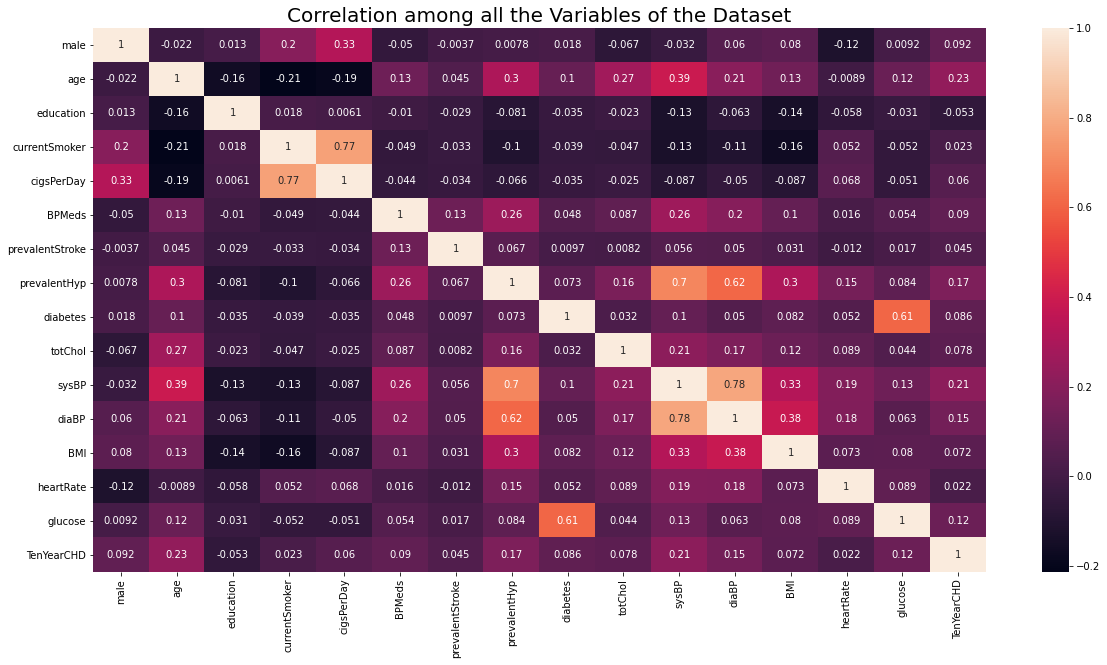

In [ ]:
#Checking relationship between variables
cor=data.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

Compared to all the independent data, the correlation coefficient between education and and target variable TenYearCHD is very low and actually negative.

### 1. Univariate Analysis

#### Categorical Features

In [ ]:
categorical_features = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

In [ ]:
for feature in categorical_features:
    print(feature,':')
    print(data[feature].value_counts())
    print("-----------------")

male :
0    2258
1    1727
Name: male, dtype: int64
-----------------
education :
1.0    1653
2.0    1209
3.0     664
4.0     459
Name: education, dtype: int64
-----------------
currentSmoker :
0    2027
1    1958
Name: currentSmoker, dtype: int64
-----------------
BPMeds :
0.0    3868
1.0     117
Name: BPMeds, dtype: int64
-----------------
prevalentStroke :
0    3963
1      22
Name: prevalentStroke, dtype: int64
-----------------
prevalentHyp :
0    2753
1    1232
Name: prevalentHyp, dtype: int64
-----------------
diabetes :
0    3885
1     100
Name: diabetes, dtype: int64
-----------------


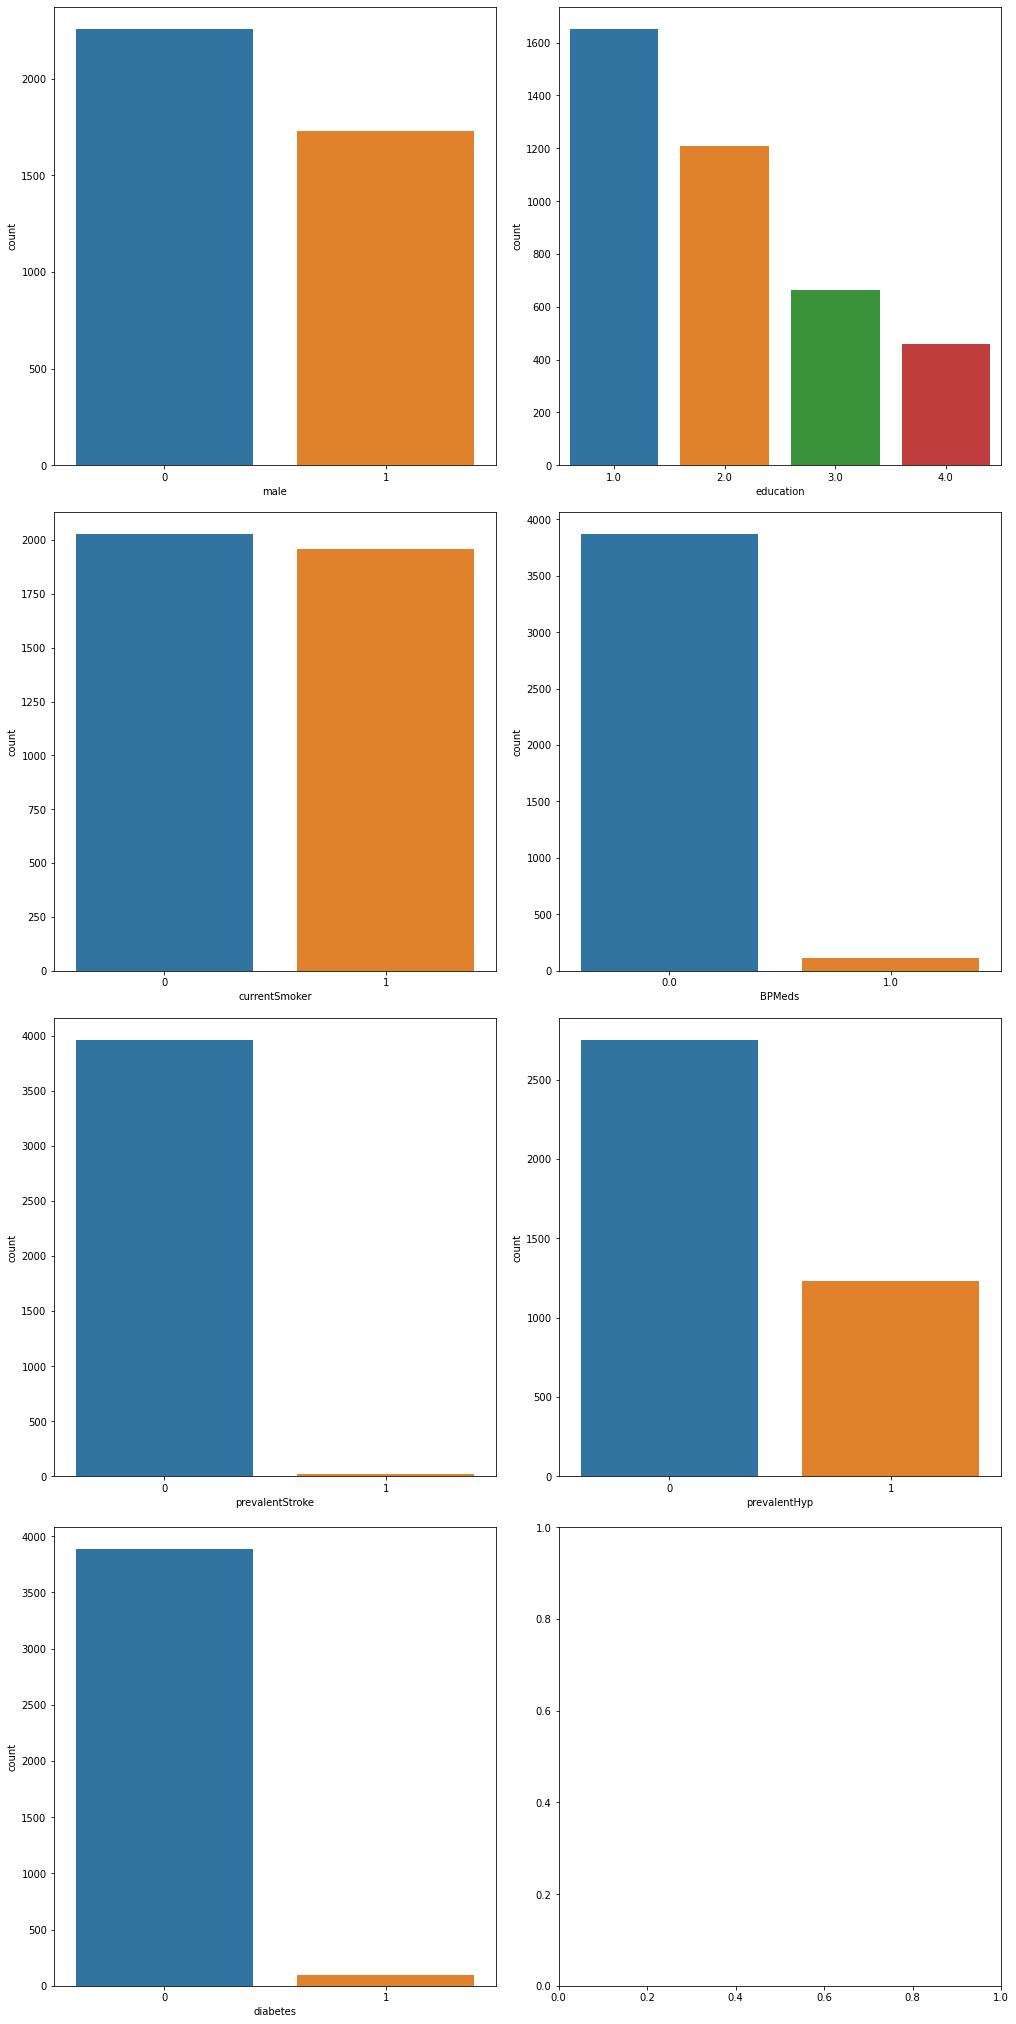

In [ ]:
num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=data, ax=axs[row][pos])

Among the categorical features:
* `BPmeds`, `prevalentStroke` and `diabetes` are highly imbalanced.
* There are four levels of `education` whereas the rest categorical features are all binary
* The number of Smokers and non-Smokers in `currentSmoker` is almost the same

#### Numerical Features

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


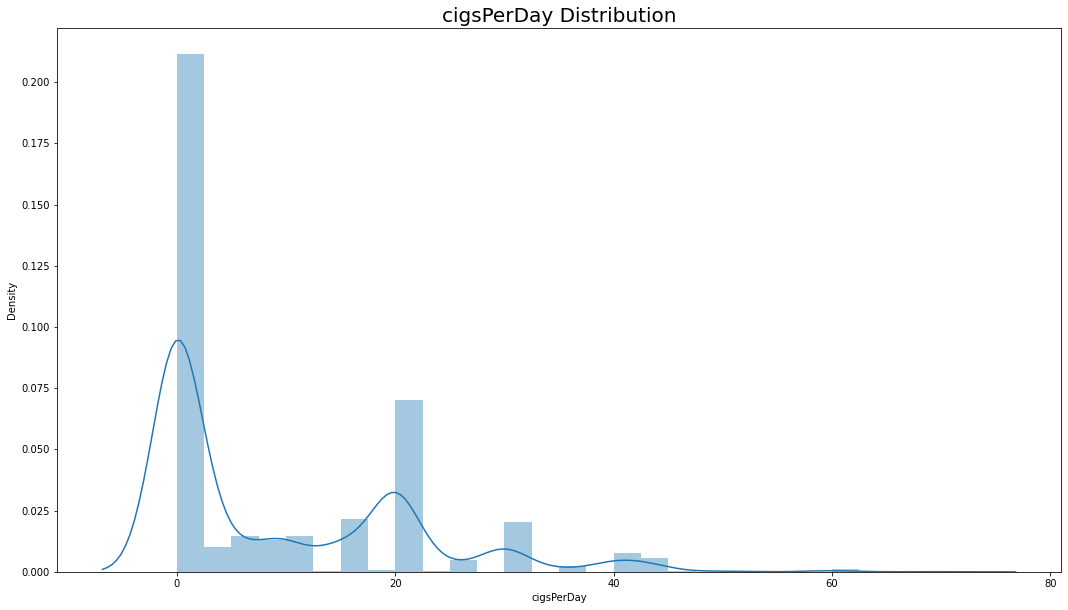

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


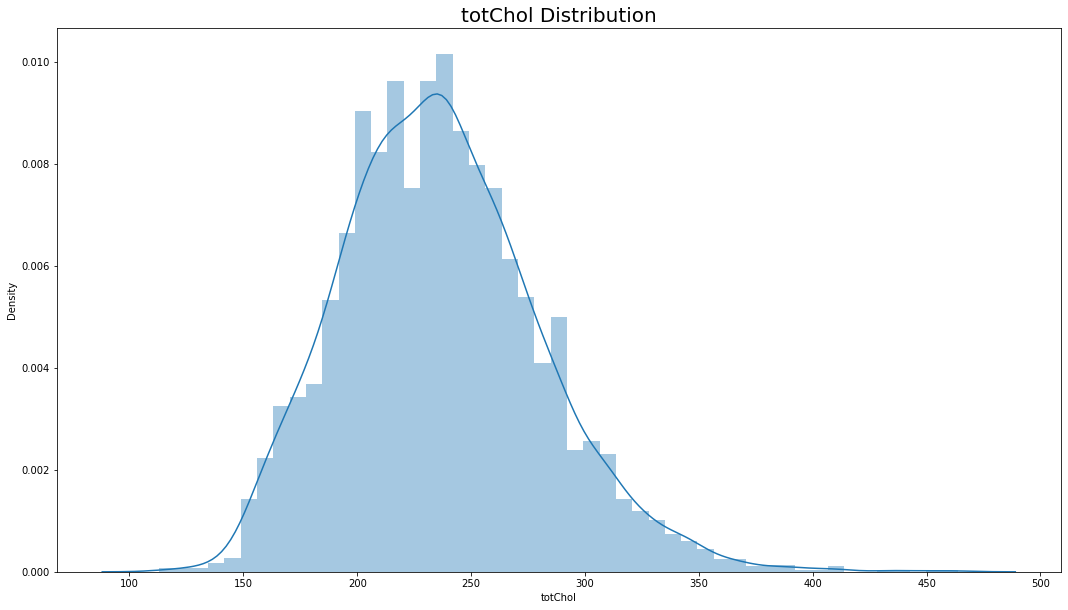

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


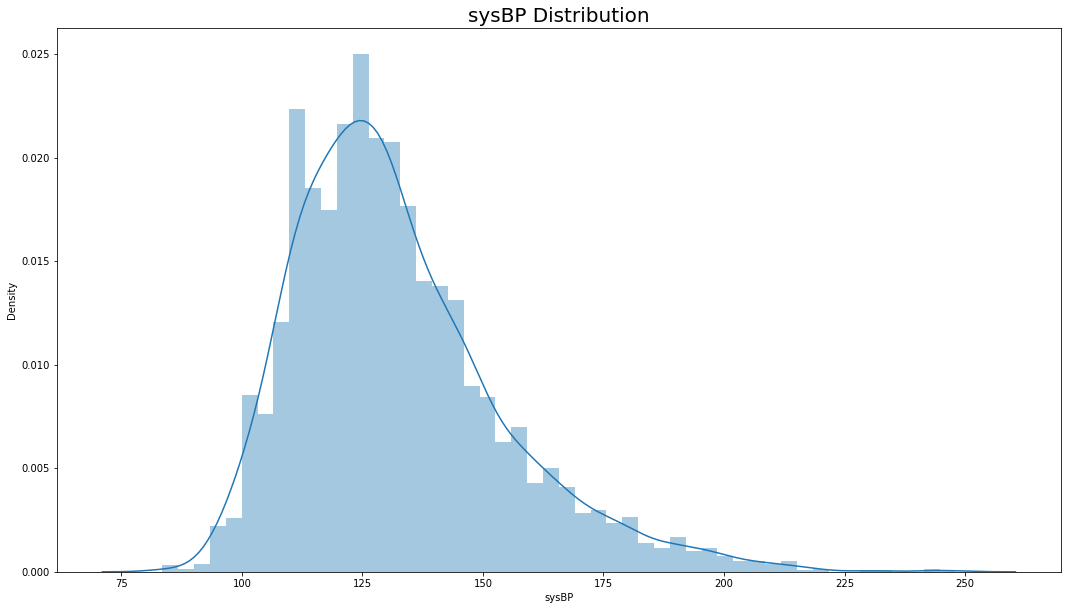

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


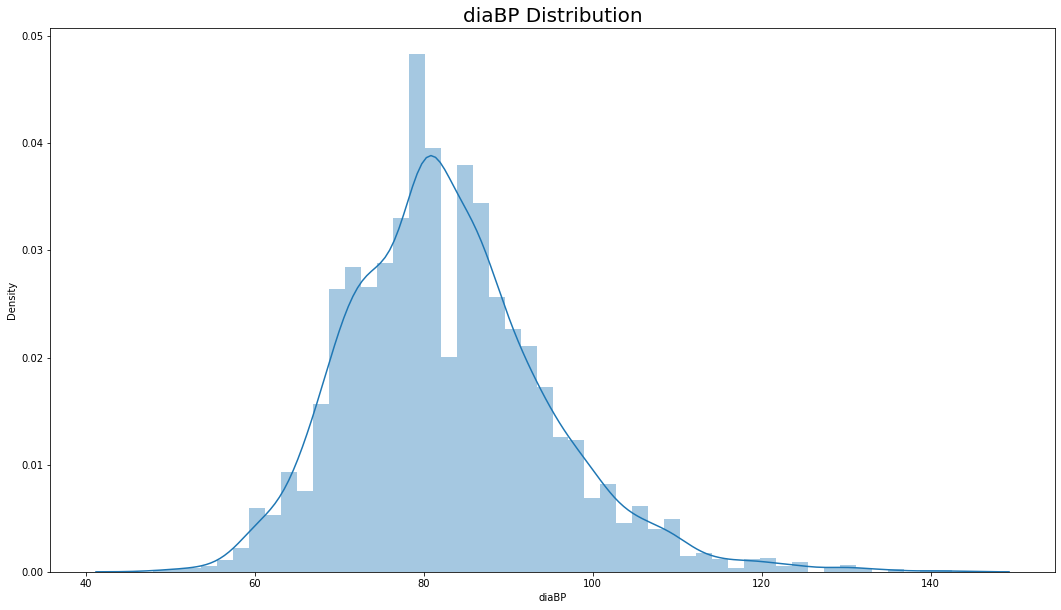

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


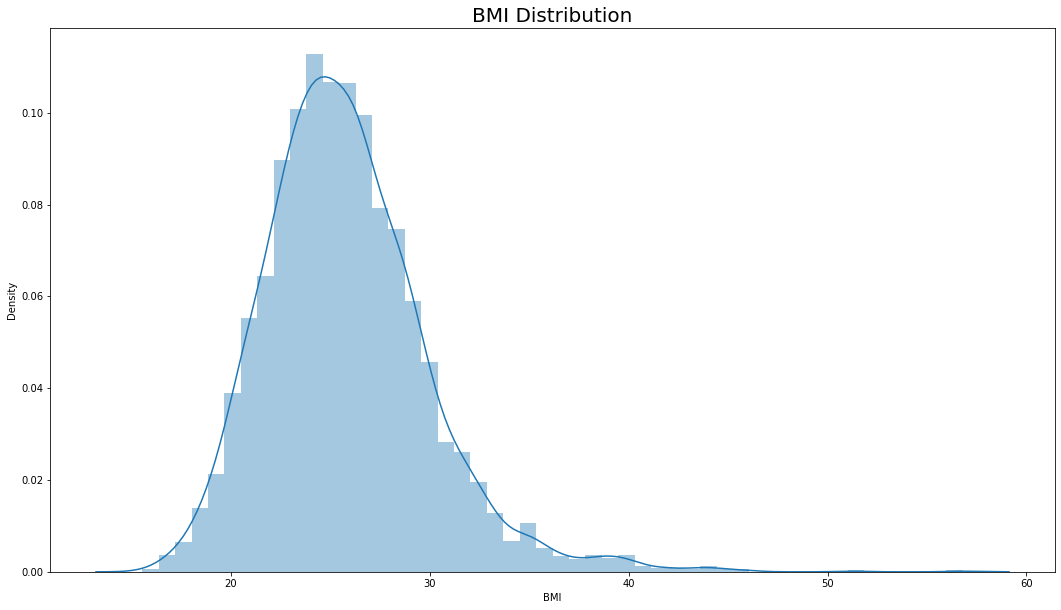

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


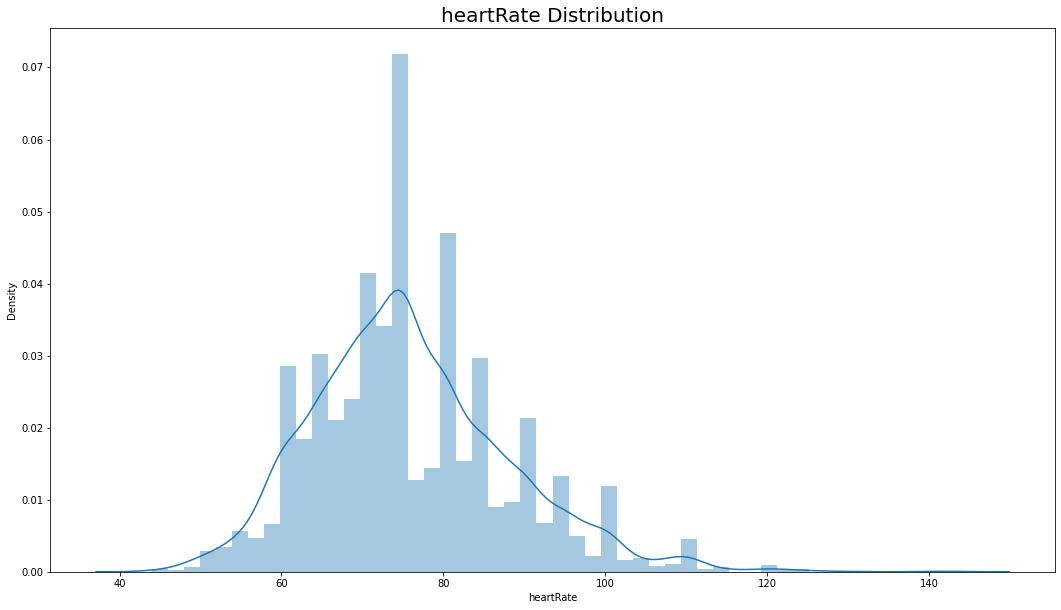

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


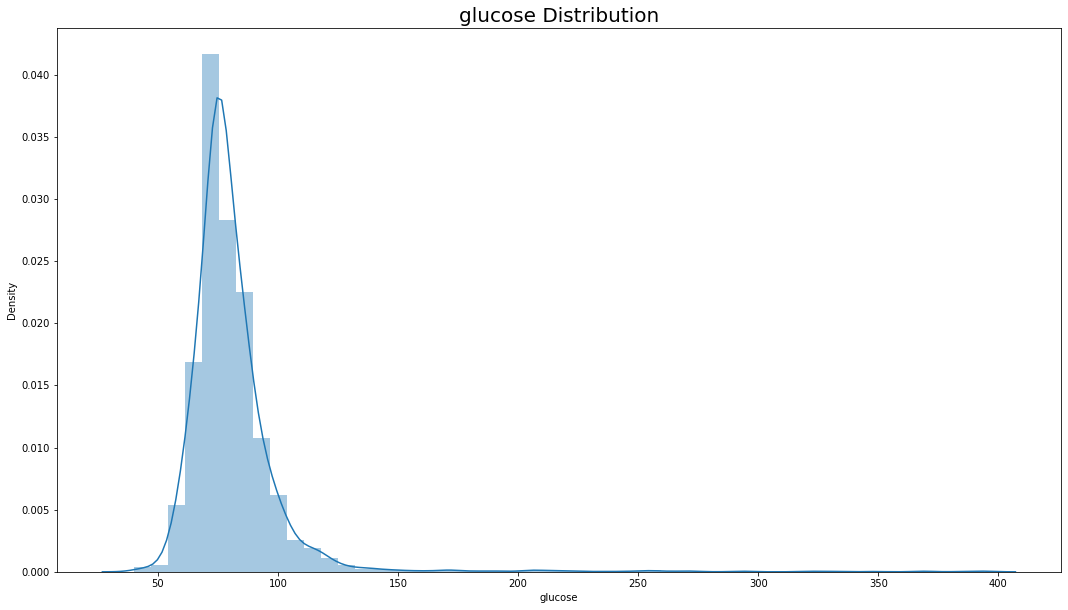

In [ ]:
numeric_features = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for feature in numeric_features:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.distplot(data[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

Among the numerical features:
* `totChol`, `sysBP`, `diaBP`and `BMI` has an uniform distribution and the rest are unevenly distributed
* `cigsPerDay` has a highly uneven distribution with the most data present in 0 
* `cigsPerDay` and `sysBP` shows quite a bit and slight right skewness respectively.

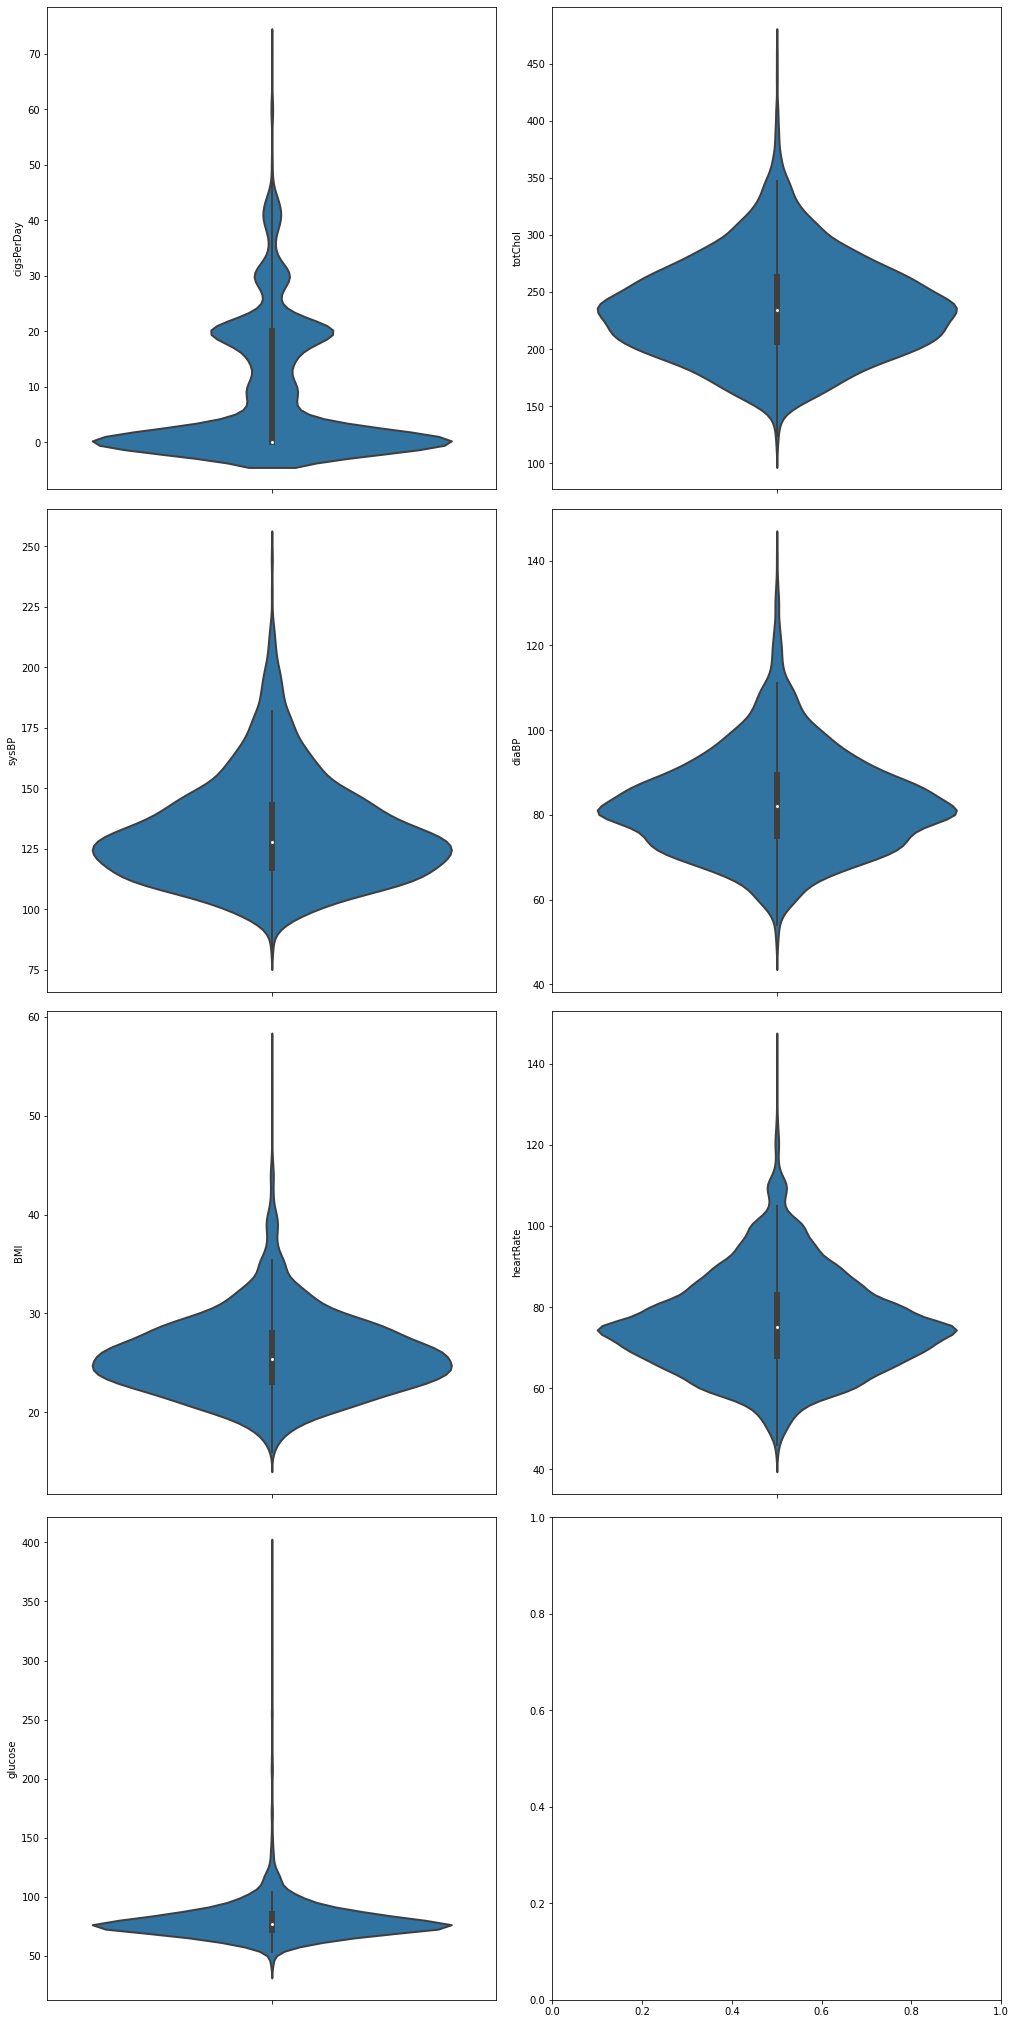

In [ ]:
num_plots = len(numeric_features)
total_cols = 2
total_rows = num_plots//total_cols + 1
color = ['m', 'g', 'b', 'r', 'y', 'v', 'o']
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(numeric_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.violinplot(y=var, data=data, ax=axs[row][pos], linewidth=2)

For the same numerical features:
* `cigsPerDay` has uneven distribution although most of the data is concentrated on `0`
* The majority portions of the following columns lie in the range: 
    * `totChol`: 150 to 300
    * `sysBP`: 100 to 150
    * `diaBP`: 60 to 100
    * `BMI`: 20 to 30
    * `heartRate`: 50 to 100
    * `glucose`: 50 to 150

#### Target Variable

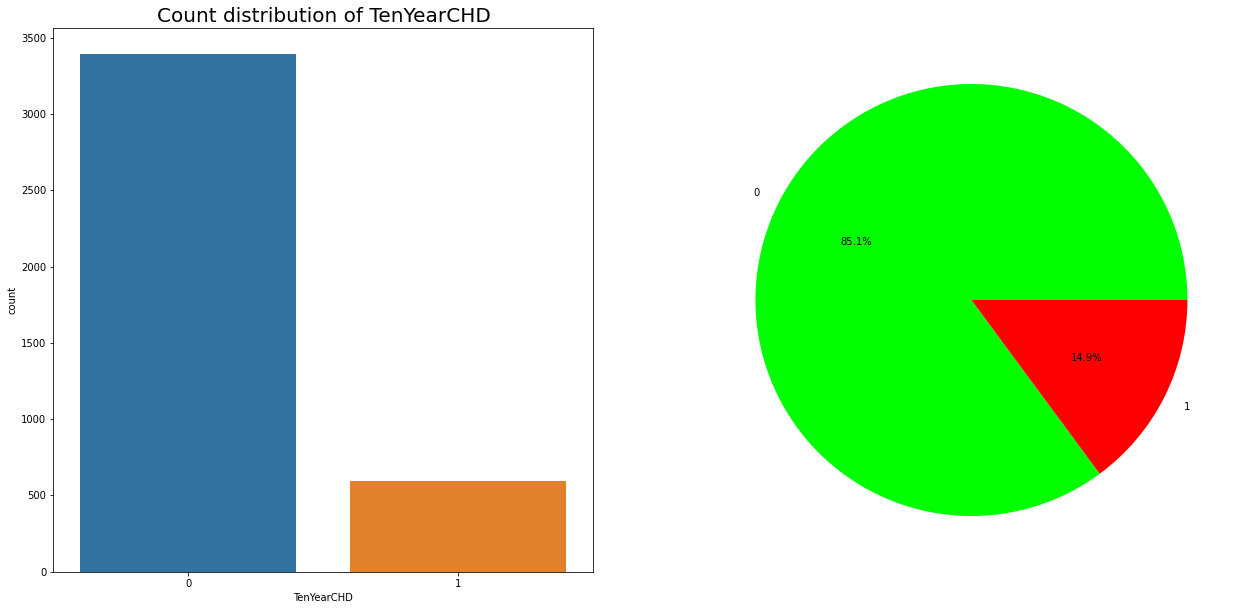

In [ ]:
#Distribution of outcome variable, Heart Disease
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=data)
plt.title("Count distribution of TenYearCHD", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(data["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["lime","red"])
plt.show()

The distribution is highly imbalanced. As in, the number of negative cases outweigh the number of positive cases. This would lead to class imbalance problem while fitting our models. Therefore, this problem needs to be addressed and taken care of.

### 2. Bivariate Analysis

#### Relationship between education and cigsPerDay

In [ ]:
#Grouping education and cigsPerDay

graph_1 = data.groupby("education", as_index=False).cigsPerDay.mean()

(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]),
 <a list of 10 Text major ticklabel objects>)

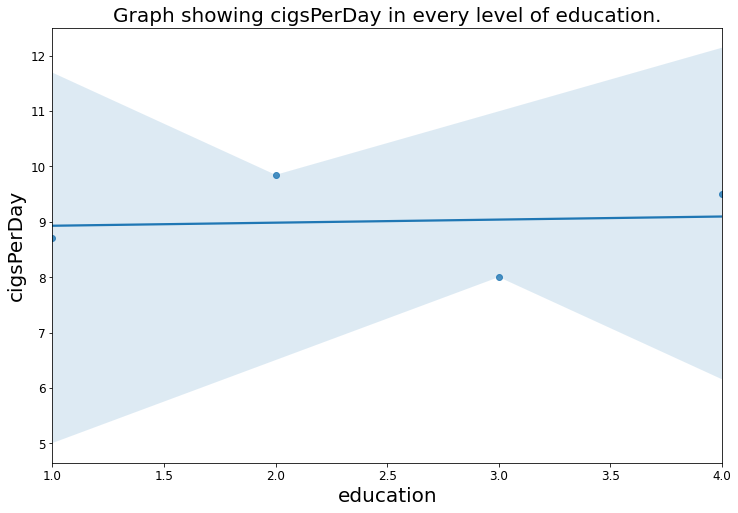

In [ ]:
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=graph_1["education"], y=graph_1["cigsPerDay"])
plt.title("Graph showing cigsPerDay in every level of education.", size=20)
plt.xlabel("education", size=20)
plt.ylabel("cigsPerDay", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

* There is no linear relationship observed.
* Level 3 `education` shows the lowest mean.

#### Which gender has more risk of coronary heart disease CHD

In [ ]:
#checking for which gender has more risk of coronary heart disease CHD

graph_2 = data.groupby("male", as_index=False).TenYearCHD.sum()

(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 8 Text major ticklabel objects>)

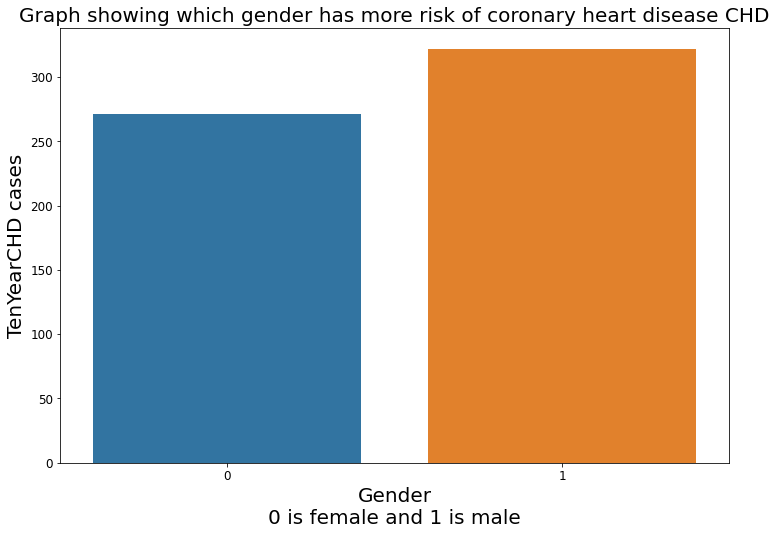

In [ ]:
#Ploting the above values

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_2["male"], y=graph_2["TenYearCHD"])
plt.title("Graph showing which gender has more risk of coronary heart disease CHD", size=20)
plt.xlabel("Gender\n0 is female and 1 is male",size=20)
plt.ylabel("TenYearCHD cases", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

According to this dataset, `males` have shown a slighly higher risk of coronary heart disease `TenYearCHD`.

#### Which age group has more smokers.

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 8 Text major ticklabel objects>)

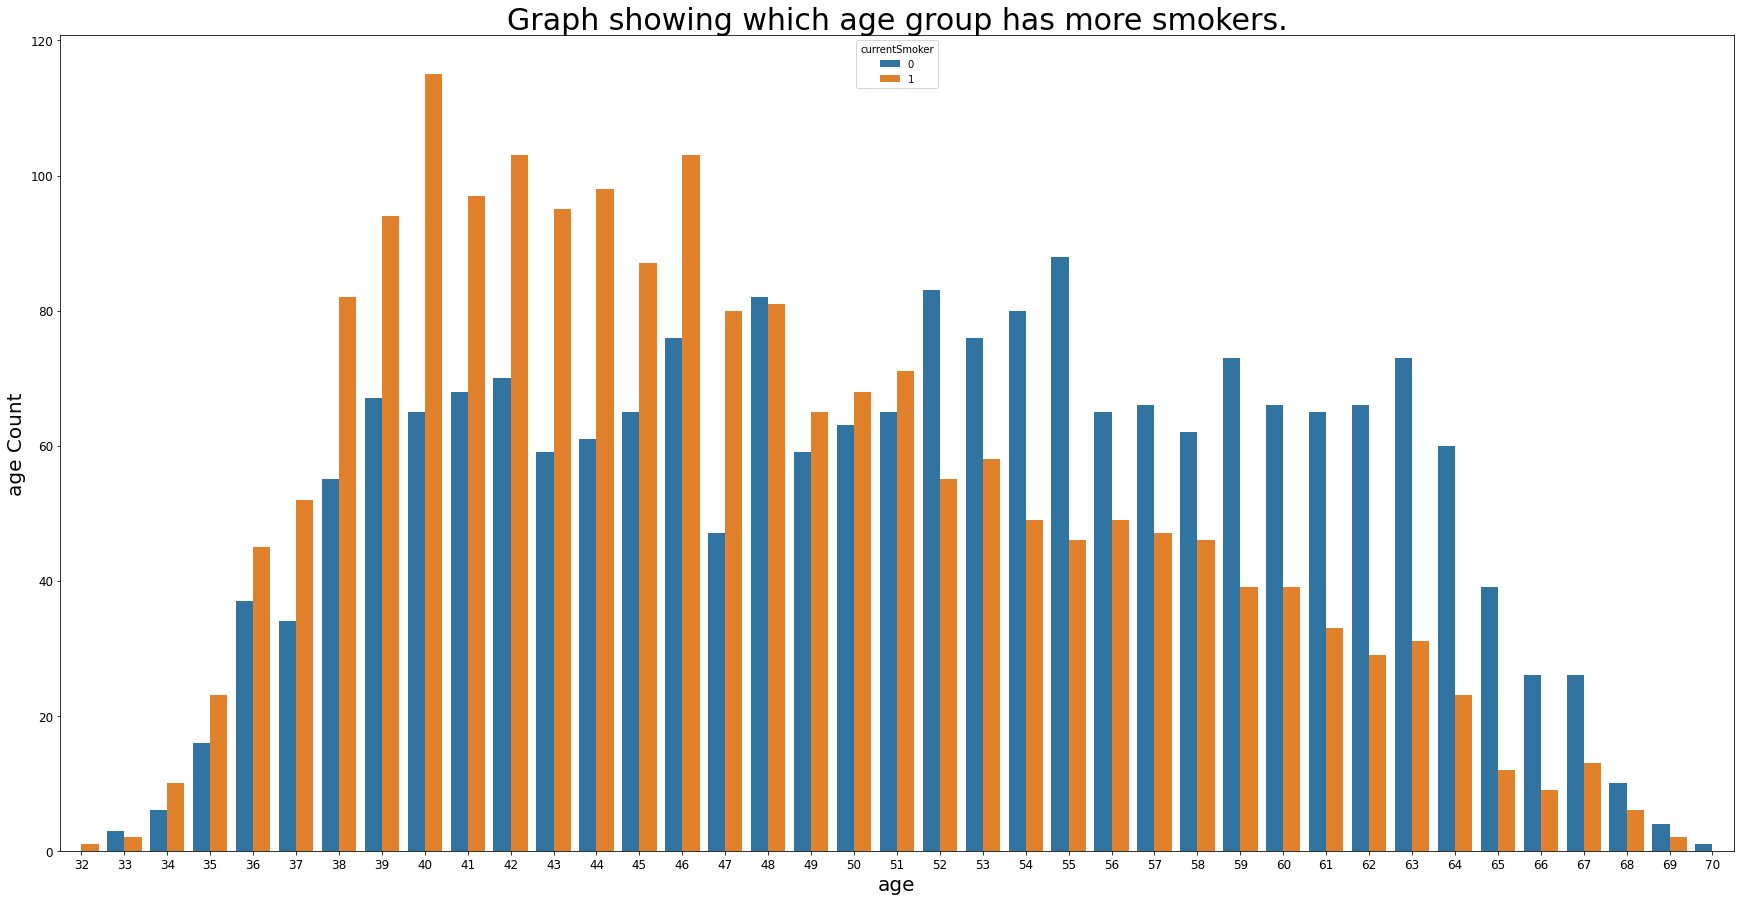

In [ ]:
#Distribution of current smokers with respect to age
plt.figure(figsize=(30,15), facecolor='w')
sns.countplot(x="age",data=data,hue="currentSmoker")
plt.title("Graph showing which age group has more smokers.", size=30)
plt.xlabel("age", size=20)
plt.ylabel("age Count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

* Mid-age groups ranging from the age of 38 - 46 have more number of `currentSmokers`
* No `currentSmokers` observed below the `age` of 32 
* maximum age for a `currentSmokers` is 70 

#### Relation between cigsPerDay and risk of coronary heart disease.

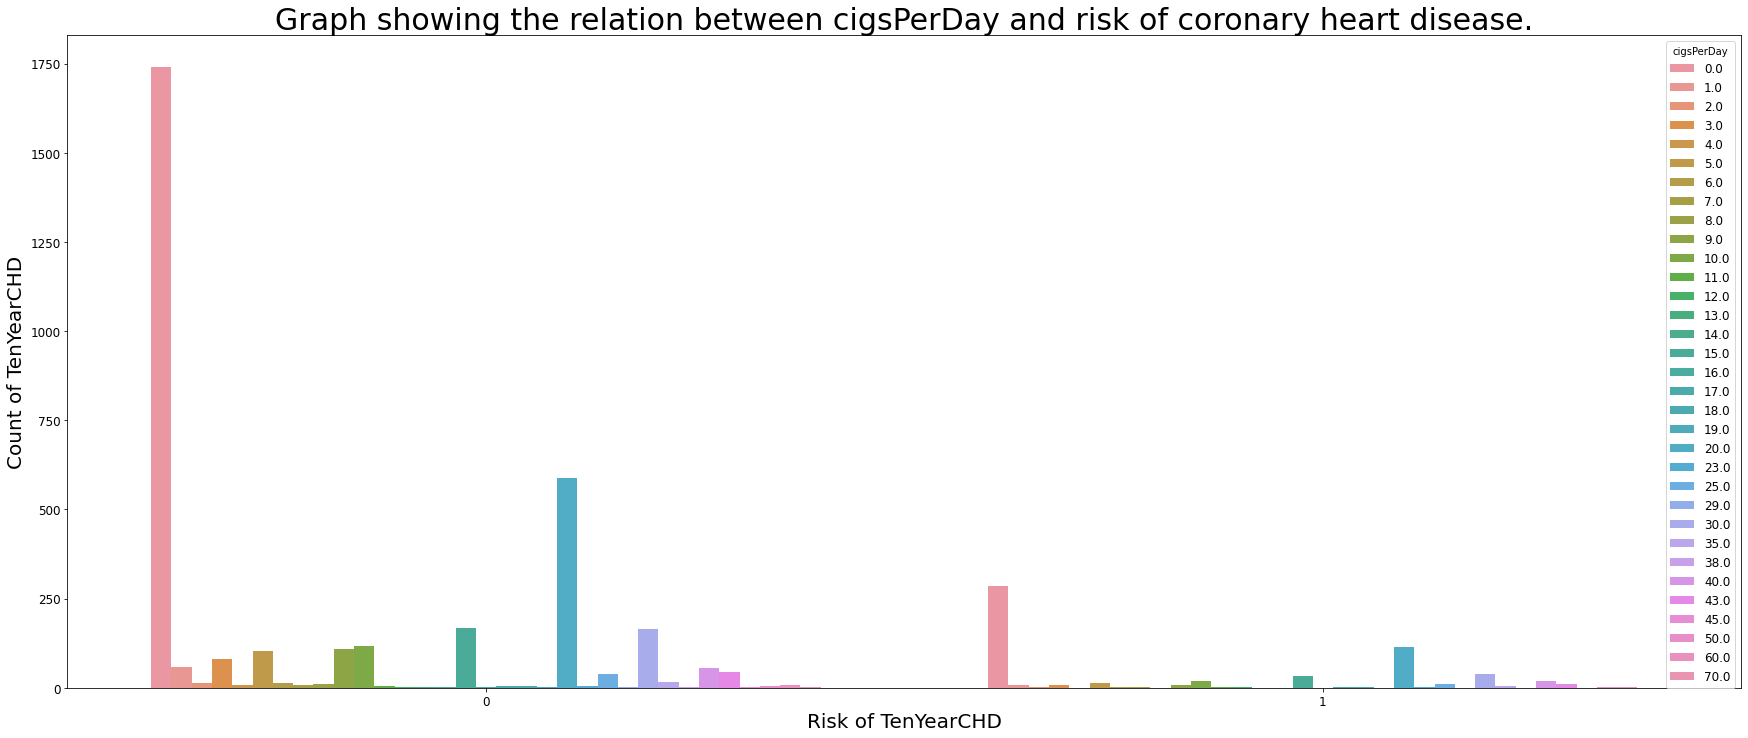

In [ ]:
plt.figure(figsize=(30,12), facecolor='w')
sns.countplot(x="TenYearCHD",data=data,hue="cigsPerDay")
plt.legend(title='cigsPerDay', fontsize='large')
plt.title("Graph showing the relation between cigsPerDay and risk of coronary heart disease.", size=30)
plt.xlabel("Risk of TenYearCHD", size=20)
plt.ylabel("Count of TenYearCHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

* Low `cigsPerDay` comes with lower risk of CHD.
* Those who don't smoke, i.e., with a `cigsPerDay` of 0.0 has a really low risk of contracting the disease
* Although that is the case, low `cigsPerDay` doesn't actually guarantee a much lower risk of CHD

#### Relation between sysBP and risk of CHD.

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text major ticklabel objects>)

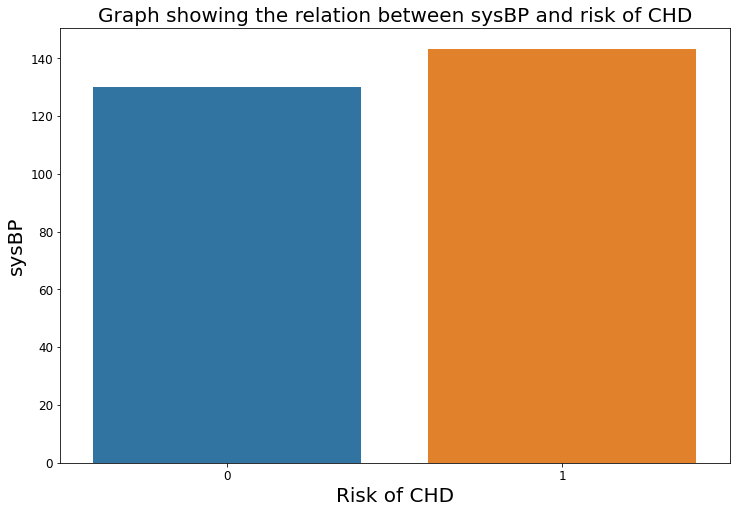

In [ ]:
# Grouping up the data and ploting it

graph_3 = data.groupby("TenYearCHD", as_index=False).sysBP.mean()

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_3["TenYearCHD"], y=graph_3["sysBP"])
plt.title("Graph showing the relation between sysBP and risk of CHD", size=20)
plt.xlabel("Risk of CHD", size=20)
plt.ylabel("sysBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

(array([ 60.,  70.,  80.,  90., 100., 110., 120., 130., 140., 150.]),
 <a list of 10 Text major ticklabel objects>)

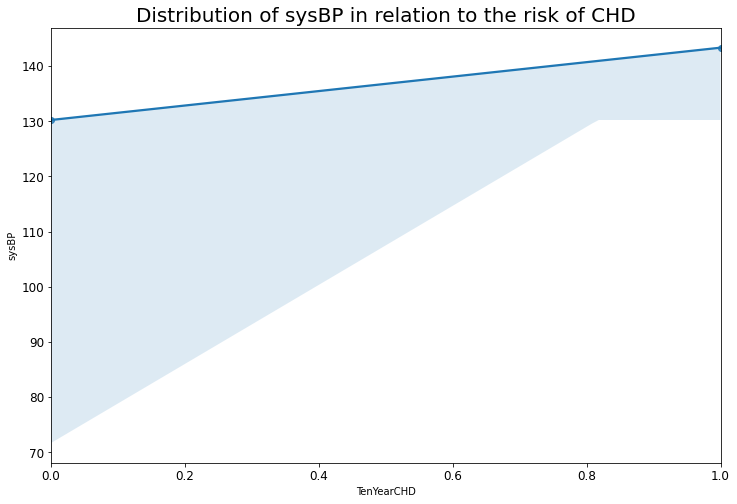

In [ ]:
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=graph_3["TenYearCHD"], y=graph_3["sysBP"])
plt.title("Distribution of sysBP in relation to the risk of CHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

* Minor relation of higher risk of `TenYearCHD` found with higher `sysBP`
* Majority of people with `sysBP` ranging from 72 - 130 has lower chance of contracting the disease.

#### Relation between diaBP and risk of CHD

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

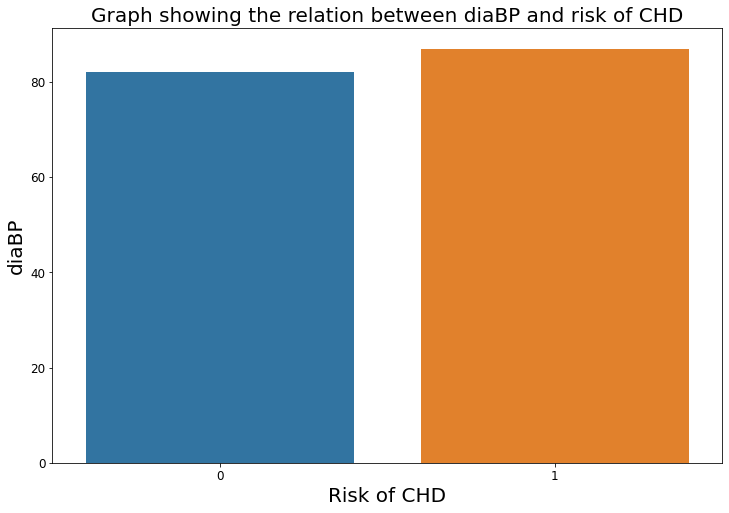

In [ ]:
# Grouping up the data and ploting it

graph_4 = data.groupby("TenYearCHD", as_index=False).diaBP.mean()

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_4["TenYearCHD"], y=graph_4["diaBP"])
plt.title("Graph showing the relation between diaBP and risk of CHD", size=20)
plt.xlabel("Risk of CHD", size=20)
plt.ylabel("diaBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

(array([40., 50., 60., 70., 80., 90.]),
 <a list of 6 Text major ticklabel objects>)

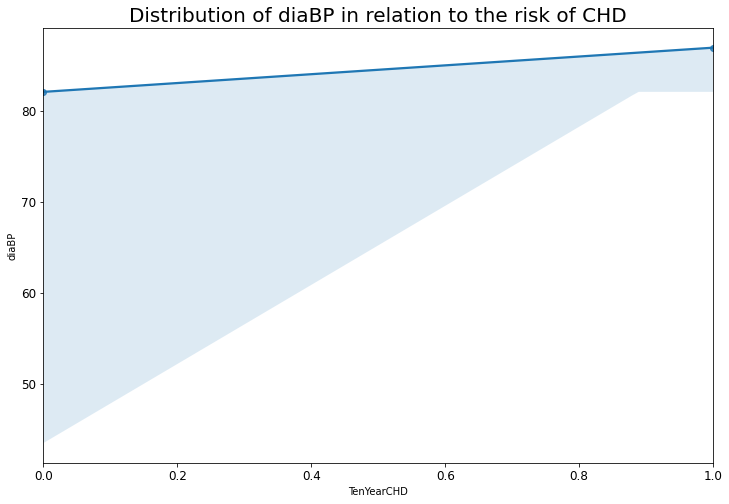

In [ ]:
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=graph_4["TenYearCHD"], y=graph_4["diaBP"])
plt.title("Distribution of diaBP in relation to the risk of CHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

* Minor relation found between higher risk of `TenYearCHD` with higher `diaBP` similar to the previous one
* Majority of people with `diaBP` ranging upto 80.0 has lower chance of contracting the disease.

#### Relation between age and totChol

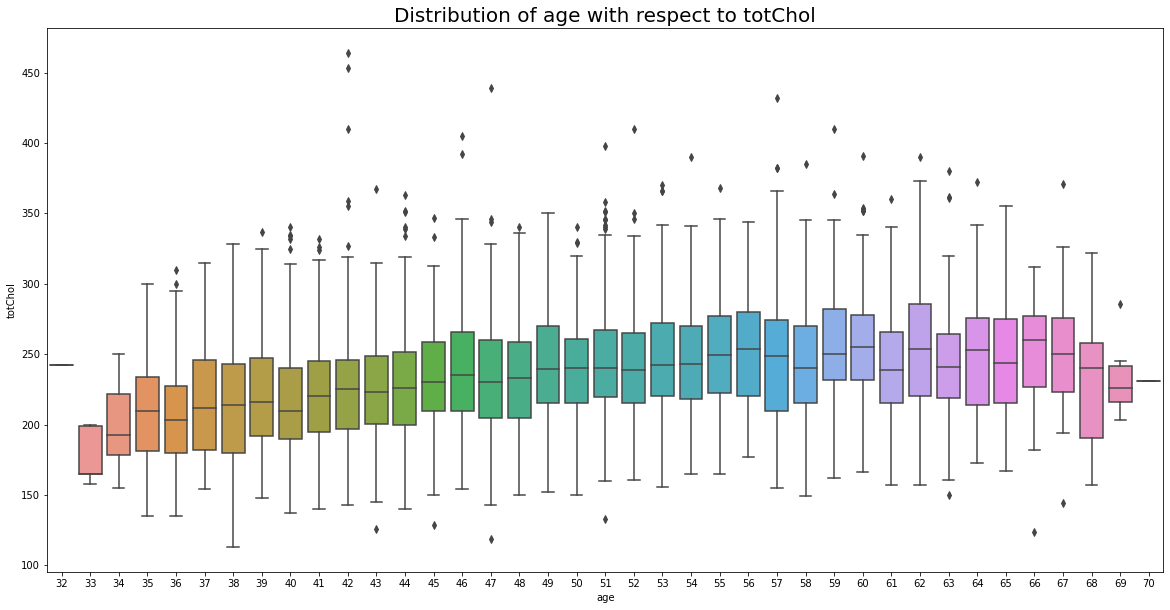

In [ ]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(x="age",y="totChol",data=data)
plt.title("Distribution of age with respect to totChol", size=20)
plt.show()

The boxplots are shifted in an upwardly manner suggesting that aged people have more cholesterol (bad cholesterol in general)

### 3. Multivariate Analysis

#### Relationship between age and cigsPerDay, totChol, glucose.

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text major ticklabel objects>)

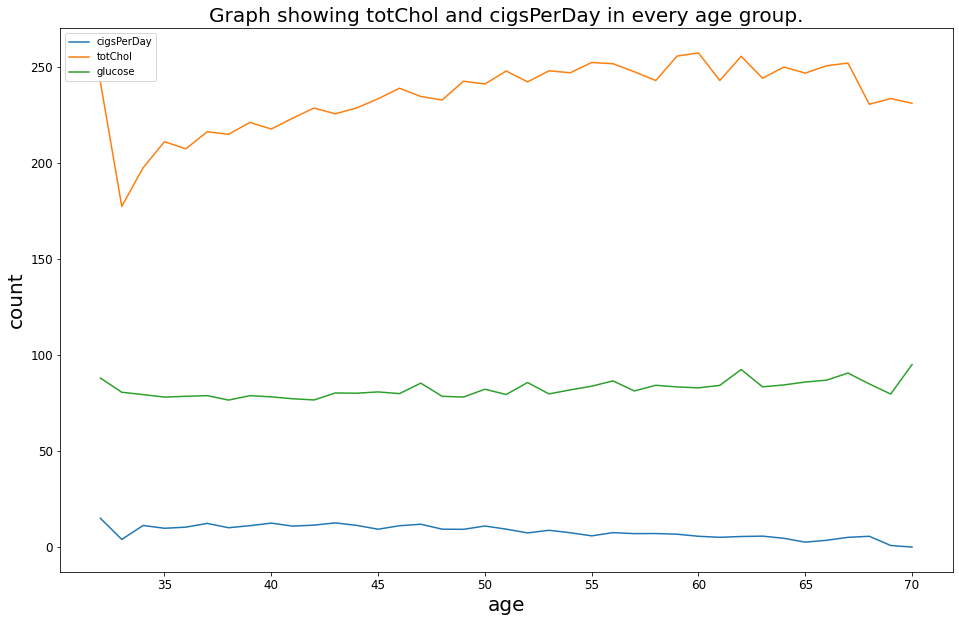

In [ ]:
#Plotting a linegraph to check the relationship between age and cigsPerDay, totChol, glucose.

graph_5 = data.groupby("age").cigsPerDay.mean()
graph_6 = data.groupby("age").totChol.mean()
graph_7 = data.groupby("age").glucose.mean()

plt.figure(figsize=(16,10), facecolor='w')
sns.lineplot(data=graph_5, label="cigsPerDay")
sns.lineplot(data=graph_6, label="totChol")
sns.lineplot(data=graph_7, label="glucose")
plt.title("Graph showing totChol and cigsPerDay in every age group.", size=20)
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

* There is a minor relation between `totChol` and `glucose`.
* `totChol` has a steep, linear and inverse graph for lower ranges of `age`
* `cigsPerDay` has a fairly parallel relationship with `age`

#### Distribution of sysBP vs diaBP with respect to currentSmoker and male attributes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


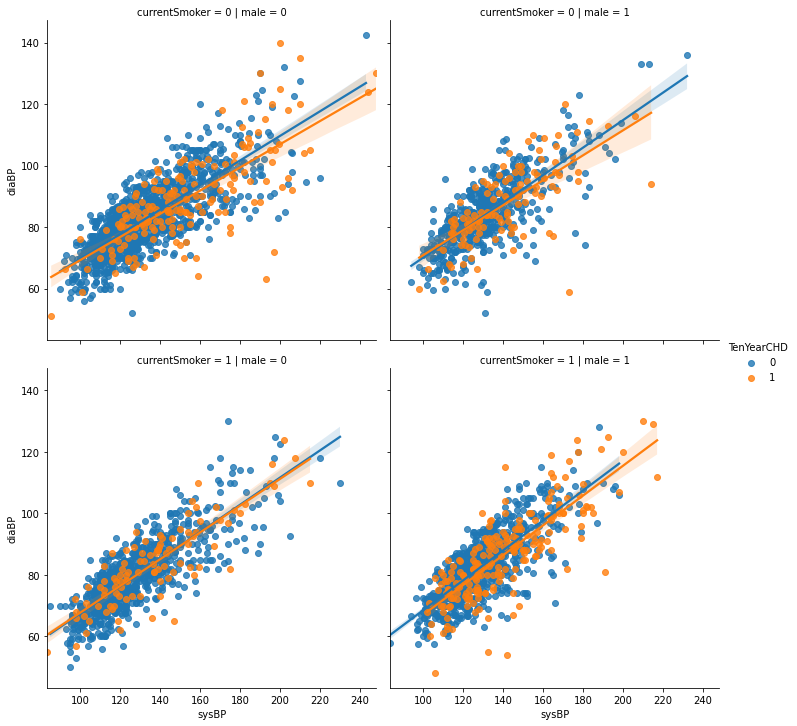

In [ ]:
#sysBP vs diaBP with respect to currentSmoker and male attributes
#plt.figure(figsize=(18, 9), facecolor='w')
sns.lmplot('sysBP', 'diaBP', 
           data=data,
           hue="TenYearCHD",
           col="male",row="currentSmoker")
plt.show()

The above graph plots the relationship between systolic blood pressure and diastolic blood pressure for patients based on their gender and whether they are current smokers or not and plots the best fit line

# Resampling imbalanced dataset by oversampling positive cases

In [ ]:
target1=data[data['TenYearCHD']==1]
target0=data[data['TenYearCHD']==0]

In [ ]:
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)

In [ ]:
target=pd.concat([target0,target1])

In [ ]:
target['TenYearCHD'].value_counts()

1    3392
0    3392
Name: TenYearCHD, dtype: int64

In [ ]:
data=target
np.shape(data)

(6784, 16)

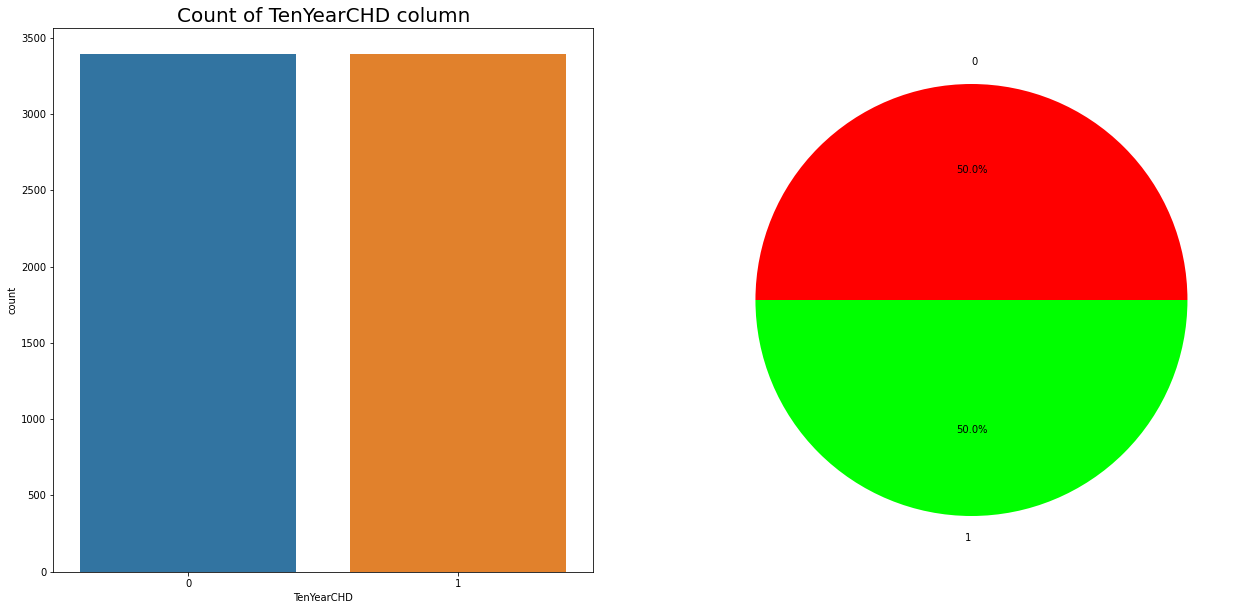

In [ ]:
#Distribution of heart disease cases in the balanced dataset, the outcome variable
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=data)
plt.title("Count of TenYearCHD column", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(data["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["red","lime"])
plt.show()

The number of positive and negative cases are equal. Hence the classes are now balanced for model fitting

# Feature Selection


In [ ]:
#To idenfify the features that have larger contribution towards the outcome variable, TenYearCHD
X=data.iloc[:,0:15]
y=data.iloc[:,-1]
print("X - ", X.shape, "\ny - ", y.shape)

X -  (6784, 15) 
y -  (6784,)


In [ ]:
#Apply SelectKBest and extract top 10 features
best=SelectKBest(score_func=chi2, k=10)

In [ ]:
fit=best.fit(X,y)

In [ ]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [ ]:
#Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

         Feature        Score
10         sysBP  2127.940554
14       glucose  1233.362900
1            age  1004.535192
4     cigsPerDay   790.532235
9        totChol   766.291552
11         diaBP   488.928591
7   prevalentHyp   221.768997
0           male    66.816351
5         BPMeds    66.216216
8       diabetes    54.258065
12           BMI    44.855037


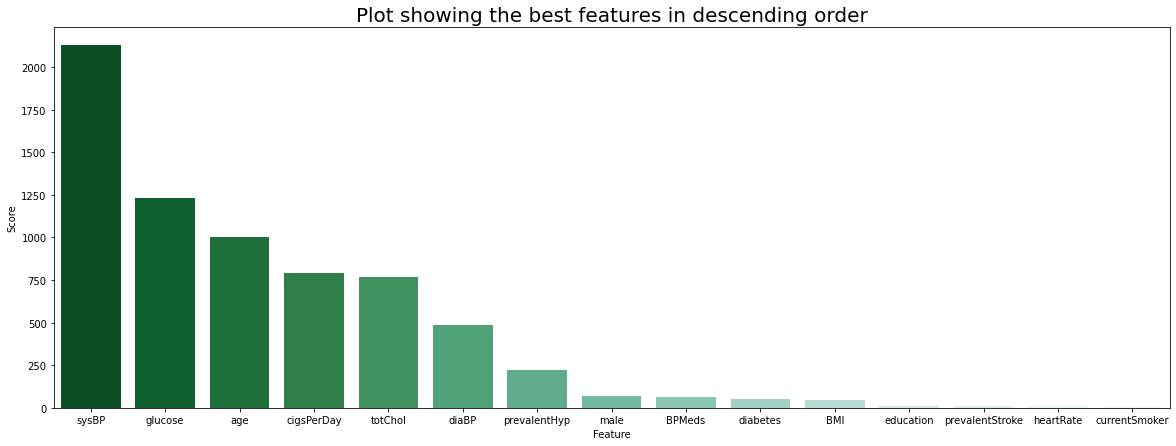

In [ ]:
#To visualize feature selection
scores=scores.sort_values(by="Score", ascending=False)
plt.figure(figsize=(20,7), facecolor='w')
sns.barplot(x='Feature',y='Score',data=scores,palette='BuGn_r')
plt.title("Plot showing the best features in descending order", size=20)
plt.show()

This plot shows the `Features` and their respective `chi-square test` scores

In [ ]:
#Select 10 features
features=scores["Feature"].tolist()[:10]
features

['sysBP',
 'glucose',
 'age',
 'cigsPerDay',
 'totChol',
 'diaBP',
 'prevalentHyp',
 'male',
 'BPMeds',
 'diabetes']

Only these features have strongest influence over the target variable. They are, in particular order:
* sysBP
* glucose
* age
* cigsPerDay
* totChol
* diaBP
* prevalentHyp
* male
* BPMeds
* diabetes


In [ ]:
data=data[['sysBP','glucose','age','cigsPerDay','totChol','diaBP','prevalentHyp','male','BPMeds','diabetes','TenYearCHD']]
data.head()

,sysBP,glucose,age,cigsPerDay,totChol,diaBP,prevalentHyp,male,BPMeds,diabetes,TenYearCHD
0,106.0,77.0,39,0.0,195.0,70.0,0,1,0.0,0,0
1,121.0,76.0,46,0.0,250.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,20.0,245.0,80.0,0,1,0.0,0,0
4,130.0,85.0,46,23.0,285.0,84.0,0,0,0.0,0,0
5,180.0,99.0,43,0.0,228.0,110.0,1,0,0.0,0,0


# Feature Splitting and Scaling

In [ ]:
y = data['TenYearCHD']
X = data.drop(['TenYearCHD'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

We divide the dataset into training and test sub-datasets for predictive modeling

In [ ]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

# Predictive Modeling

We use the following different machine learning models for the dataset:

1. Logistic Regressor
2. K-Nearest Neighbour Classifier
3. Random Forest Classifier
4. Decision Tree Classifier
5. Gradient Boosting Classifier
6. Support Vector Classifier
7. Naive Bayes Classifier
8. LGBMClassifier
9. XGBClassifier
10. MLPClassifier

In [ ]:
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(test_y,lr_predict))

confussion matrix
[[885 471]
 [420 938]]


Accuracy of Logistic Regression: 67.17022844509948 

              precision    recall  f1-score   support

           0       0.68      0.65      0.67      1356
           1       0.67      0.69      0.68      1358

    accuracy                           0.67      2714
   macro avg       0.67      0.67      0.67      2714
weighted avg       0.67      0.67      0.67      2714



In [ ]:
m2 = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(train_x, train_y)
knn_predict = knn.predict(test_x)
knn_conf_matrix = confusion_matrix(test_y, knn_predict)
knn_acc_score = accuracy_score(test_y, knn_predict)
print("confusion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
print(classification_report(test_y, knn_predict))

confussion matrix
[[1114  242]
 [  14 1344]]


Accuracy of k-NN Classification: 90.56742815033162 

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      1356
           1       0.85      0.99      0.91      1358

    accuracy                           0.91      2714
   macro avg       0.92      0.91      0.90      2714
weighted avg       0.92      0.91      0.90      2714



In [ ]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
rf.fit(train_x,train_y)
rf_predicted = rf.predict(test_x)
rf_conf_matrix = confusion_matrix(test_y, rf_predicted)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("confusion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(test_y,rf_predicted))

confussion matrix
[[1147  209]
 [  34 1324]]


Accuracy of Random Forest: 91.04642593957259 

              precision    recall  f1-score   support

           0       0.97      0.85      0.90      1356
           1       0.86      0.97      0.92      1358

    accuracy                           0.91      2714
   macro avg       0.92      0.91      0.91      2714
weighted avg       0.92      0.91      0.91      2714



In [ ]:
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)
dt.fit(train_x,train_y)
dt_predicted = dt.predict(test_x)
dt_conf_matrix = confusion_matrix(test_y, dt_predicted)
dt_acc_score = accuracy_score(test_y, dt_predicted)
print("confusion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(test_y,dt_predicted))

confussion matrix
[[1069  287]
 [  19 1339]]


Accuracy of DecisionTreeClassifier: 88.72512896094325 

              precision    recall  f1-score   support

           0       0.98      0.79      0.87      1356
           1       0.82      0.99      0.90      1358

    accuracy                           0.89      2714
   macro avg       0.90      0.89      0.89      2714
weighted avg       0.90      0.89      0.89      2714



In [ ]:
m5 = 'Gradient Boosting Classifier'
gvc =  GradientBoostingClassifier()
gvc.fit(train_x,train_y)
gvc_predicted = gvc.predict(test_x)
gvc_conf_matrix = confusion_matrix(test_y, gvc_predicted)
gvc_acc_score = accuracy_score(test_y, gvc_predicted)
print("confusion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')
print(classification_report(test_y,gvc_predicted))

confussion matrix
[[ 943  413]
 [ 329 1029]]


Accuracy of Gradient Boosting Classifier: 72.66028002947678 

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      1356
           1       0.71      0.76      0.73      1358

    accuracy                           0.73      2714
   macro avg       0.73      0.73      0.73      2714
weighted avg       0.73      0.73      0.73      2714



In [ ]:
m6 = 'Support Vector Classifier'
svc = SVC(kernel = 'linear')
svc.fit(train_x,train_y)
svc_predicted = svc.predict(test_x)
svc_conf_matrix = confusion_matrix(test_y, svc_predicted)
svc_acc_score = accuracy_score(test_y, svc_predicted)
print("confusion matrix")
print(svc_conf_matrix)
print("\n")
print("Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(test_y,svc_predicted))

# kernels = ['linear', 'poly', 'rbf', 'sigmoid']


confussion matrix
[[869 487]
 [398 960]]


Support Vector Classifier: 67.3913043478261 

              precision    recall  f1-score   support

           0       0.69      0.64      0.66      1356
           1       0.66      0.71      0.68      1358

    accuracy                           0.67      2714
   macro avg       0.67      0.67      0.67      2714
weighted avg       0.67      0.67      0.67      2714



In [ ]:
m7 = 'Naive Bayes Classifier'
nbc = GaussianNB()
nbc.fit(train_x,train_y)
nbc_predicted = nbc.predict(test_x)
nbc_conf_matrix = confusion_matrix(test_y, nbc_predicted)
nbc_acc_score = accuracy_score(test_y, nbc_predicted)
print("confusion matrix")
print(nbc_conf_matrix)
print("\n")
print("Naive Bayes Classifier:",nbc_acc_score*100,'\n')
print(classification_report(test_y,nbc_predicted))


confusion matrix
[[1157  199]
 [ 870  488]]


Naive Bayes Classifier: 60.61164333087693 

              precision    recall  f1-score   support

           0       0.57      0.85      0.68      1356
           1       0.71      0.36      0.48      1358

    accuracy                           0.61      2714
   macro avg       0.64      0.61      0.58      2714
weighted avg       0.64      0.61      0.58      2714



In [ ]:
m8 = 'LGBMClassifier'
lg=LGBMClassifier(boosting_type='gbdt',n_estimators=5000,learning_rate=0.05,objective='binary',metric='accuracy',is_unbalance=True,
                 colsample_bytree=0.7,reg_lambda=3,reg_alpha=3,random_state=500,n_jobs=-1,num_leaves=35)
lg.fit(train_x,train_y)
lg_predicted = lg.predict(test_x)
lg_conf_matrix = confusion_matrix(test_y, lg_predicted)
lg_acc_score = accuracy_score(test_y, lg_predicted)
print("confusion matrix")
print(lg_conf_matrix)
print("\n")
print("LGBMClassifier:",lg_acc_score*100,'\n')
print(classification_report(test_y,lg_predicted))


confusion matrix
[[1083  273]
 [  86 1272]]


LGBMClassifier: 86.7722918201916 

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1356
           1       0.82      0.94      0.88      1358

    accuracy                           0.87      2714
   macro avg       0.87      0.87      0.87      2714
weighted avg       0.87      0.87      0.87      2714



In [ ]:
m9 = 'XGBClassifier'
xg = XGBClassifier(learning_rate=0.05, n_estimators=100,max_depth=4, subsample = 0.9,colsample_bytree = 0.1, gamma=1,random_state=42)
xg.fit(train_x,train_y)
xg_predicted = xg.predict(test_x)
xg_conf_matrix = confusion_matrix(test_y, xg_predicted)
xg_acc_score = accuracy_score(test_y, xg_predicted)
print("confusion matrix")
print(xg_conf_matrix)
print("\n")
print("XGBClassifier:",xg_acc_score*100,'\n')
print(classification_report(test_y,xg_predicted))


confusion matrix
[[938 418]
 [403 955]]


XGBClassifier: 69.74944731024318 

              precision    recall  f1-score   support

           0       0.70      0.69      0.70      1356
           1       0.70      0.70      0.70      1358

    accuracy                           0.70      2714
   macro avg       0.70      0.70      0.70      2714
weighted avg       0.70      0.70      0.70      2714



In [ ]:
m10 = 'MLPClassifier'
mlp=MLPClassifier(solver='adam', learning_rate_init = 0.0005, learning_rate = 'adaptive', activation="relu", max_iter=3000, random_state=10)
mlp.fit(train_x,train_y)
mlp_predicted = mlp.predict(test_x)
mlp_conf_matrix = confusion_matrix(test_y, mlp_predicted)
mlp_acc_score = accuracy_score(test_y, mlp_predicted)
print("confusion matrix")
print(mlp_conf_matrix)
print("\n")
print("MLPClassifier:",mlp_acc_score*100,'\n')
print(classification_report(test_y,mlp_predicted))


confusion matrix
[[921 435]
 [453 905]]


MLPClassifier: 67.28076639646278 

              precision    recall  f1-score   support

           0       0.67      0.68      0.67      1356
           1       0.68      0.67      0.67      1358

    accuracy                           0.67      2714
   macro avg       0.67      0.67      0.67      2714
weighted avg       0.67      0.67      0.67      2714



## ROC Curve To Compare All Models

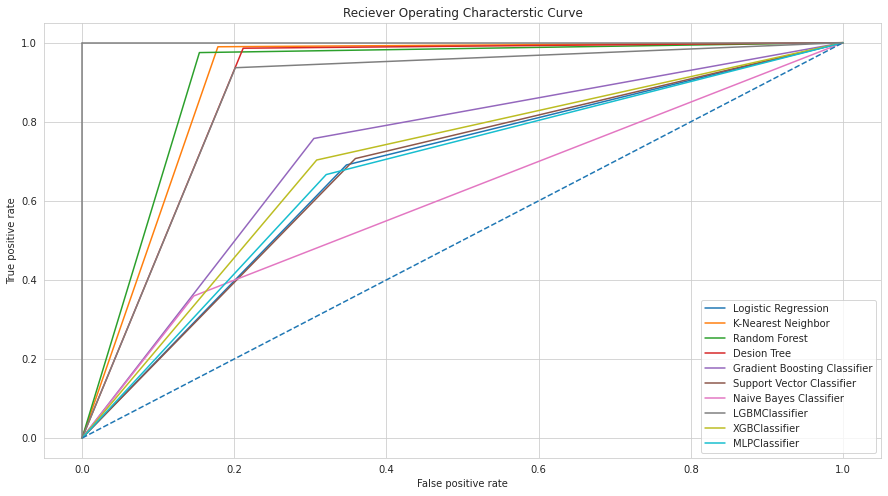

In [ ]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(test_y,lr_predict)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(test_y,knn_predict)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(test_y,rf_predicted)                                                             
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(test_y,dt_predicted)
gvc_false_positive_rate,gvc_true_positive_rate,gvc_threshold = roc_curve(test_y,gvc_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(test_y,svc_predicted)
nbc_false_positive_rate,nbc_true_positive_rate,nbc_threshold = roc_curve(test_y,nbc_predicted)
lg_false_positive_rate,lg_true_positive_rate,lg_threshold = roc_curve(test_y,lg_predicted)
xg_false_positive_rate,xg_true_positive_rate,xg_threshold = roc_curve(test_y,xg_predicted)
mlp_false_positive_rate,mlp_true_positive_rate,mlp_threshold = roc_curve(test_y,mlp_predicted)




sns.set_style('whitegrid')
plt.figure(figsize=(15,8), facecolor='w')
plt.title('Reciever Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(gvc_false_positive_rate,gvc_true_positive_rate,label='Gradient Boosting Classifier')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot(nbc_false_positive_rate,nbc_true_positive_rate,label='Naive Bayes Classifier')
plt.plot(lg_false_positive_rate,lg_true_positive_rate,label='LGBMClassifier')
plt.plot(xg_false_positive_rate,xg_true_positive_rate,label='XGBClassifier')
plt.plot(mlp_false_positive_rate,mlp_true_positive_rate,label='MLPClassifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# **Model Evaluation**

In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','KNN','Random Forest',
                                   'Decision Tree','Gradient Boosting','SVC','Naive Bayes','LGBMClassifier','XGBClassifier','MLPClassifier'], 
                         'Accuracy': [lr_acc_score*100, knn_acc_score*100, rf_acc_score*100, dt_acc_score*100,gvc_acc_score*100,
                                      svc_acc_score*100,nbc_acc_score*100,lg_acc_score*100,xg_acc_score*100,mlp_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,67.170228
1,KNN,90.567428
2,Random Forest,91.046426
3,Decision Tree,88.725129
4,Gradient Boosting,72.660280
5,SVC,67.391304
6,Naive Bayes,60.611643
7,LGBMClassifier,86.772292
8,XGBClassifier,69.749447
9,MLPClassifier,67.280766


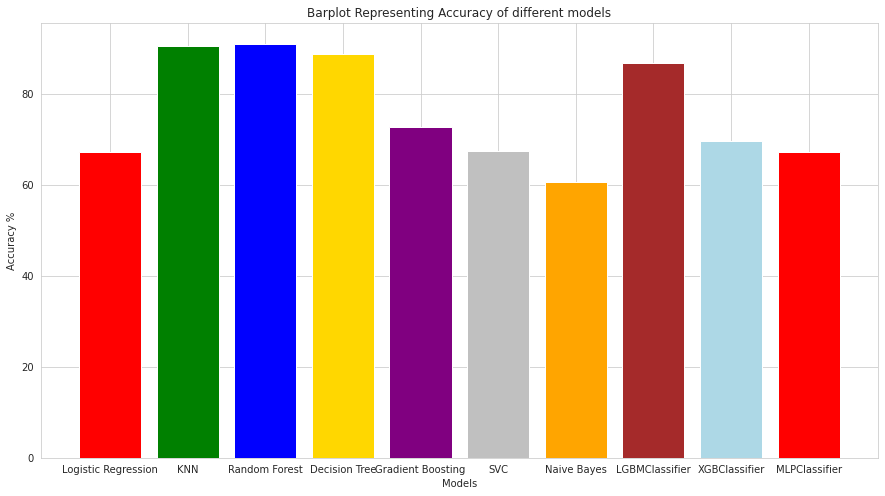

In [ ]:
colors = ['red','green','blue','gold','purple','silver','orange','brown','lightblue']
plt.figure(figsize=(15,8), facecolor='w')
plt.title("Barplot Representing Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Models")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

### Random Forest Classifier

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


## Finding Best Hyperparameters for Random Forest Model
#### Using Randomized Search Cross Validation


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=7, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(train_x,train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 19.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=90, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Final Logistic Regression Model

In [ ]:
model = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=90, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

model.fit(train_x, train_y)

score = model.score(test_x, test_y)

print("The accuracy of our model is ", score)

The accuracy of our model is  0.9602063375092115


# **Conclusions**
Random Forest Classifier Model performs best among all models

In [ ]:
import pickle

In [ ]:
file='Heart_disease_predict.pickle'
pickle.dump(model,open(file,'wb'))
